## Import libraries

In [1]:
# Base libraries
import pandas as pd
import numpy as np
from pyforest import *

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")


import pickle
# import yaml


## Exploring the database

In [2]:
# Open the excel database 
# In Row the 184 countries and the years
Synthesis = pd.read_excel('C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Data/Health_Wealth_Synthesis2.xlsx')
pd.set_option('display.max_columns', None)
Synthesis.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Column1,Country Name,Years,GDP*Health per capita,"GDP per capita, PPP (constant 2011 international $)",Electric power consumption (kWh per capita),Employment in services (% of total employment) (modeled ILO estimate),Fixed broadband Internet subscribers (per 100 people),Individuals using the Internet (% of population),International migrant stock (% of population),"Own-account workers, total (% of male employment) (modeled ILO estimate)",Population ages 0-14 (% of total),Population ages 15-64 (% of total),"Self-employed, total (% of total employment) (modeled ILO estimate)",Telephone lines (per 100 people),Urban population (% of total),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),Prevalence of overweight (% of adults),"School enrollment, tertiary (%)"
0,0,Afghanistan,2004,6.0534,1062,62,21,0,0,0,42,47,49,75,0,22,74,24,32,44,7,189,57,8,1180,15,80,75,34,46,16,1
1,1,Afghanistan,2005,6.5888,1136,62,21,0,1,0,42,47,50,74,0,22,73,25,33,44,6,189,58,7,1140,15,77,79,36,45,16,5
2,2,Afghanistan,2006,6.7338,1161,62,22,0,2,0,42,47,50,74,0,22,73,25,34,44,6,189,58,7,1120,15,74,87,38,44,17,5
3,3,Afghanistan,2007,7.5756,1284,62,23,0,1,0,42,47,49,72,0,23,71,27,35,44,6,189,59,7,1090,15,71,83,40,44,17,5
4,4,Afghanistan,2008,7.6582,1298,301,25,0,1,0,42,47,49,72,0,23,71,27,36,44,6,189,59,6,1030,15,69,98,43,44,18,5


In [3]:
Synthesis.shape


(1999, 32)

## Check, replace and drop clolumns with many missing values

In [4]:
Synthesis = Synthesis.apply(lambda x : x.replace("..", np.nan))
Synthesis.tail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Column1,Country Name,Years,GDP*Health per capita,"GDP per capita, PPP (constant 2011 international $)",Electric power consumption (kWh per capita),Employment in services (% of total employment) (modeled ILO estimate),Fixed broadband Internet subscribers (per 100 people),Individuals using the Internet (% of population),International migrant stock (% of population),"Own-account workers, total (% of male employment) (modeled ILO estimate)",Population ages 0-14 (% of total),Population ages 15-64 (% of total),"Self-employed, total (% of total employment) (modeled ILO estimate)",Telephone lines (per 100 people),Urban population (% of total),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),Prevalence of overweight (% of adults),"School enrollment, tertiary (%)"
1994,2842,Zimbabwe,2012,10.2905,1871,542,26,0,12,2,56,41,55,66,2,32,65,33,30,35,4,355,55,2,528,37,46,57,66,46,36,6
1995,2843,Zimbabwe,2013,10.8024,1929,557,26,0,15,2,55,41,55,65,2,32,65,34,31,35,4,304,56,2,509,37,44,54,65,44,37,6
1996,2844,Zimbabwe,2014,11.1650,1925,536,25,0,16,2,57,41,55,66,2,32,65,33,31,35,3,278,58,2,494,37,42,52,65,42,37,7
1997,2845,Zimbabwe,2015,11.2808,1912,636,25,1,22,2,57,41,55,66,2,32,65,33,32,36,3,242,59,2,480,38,42,51,64,41,37,10
1998,2846,Zimbabwe,2016,11.2740,1879,636,25,1,23,2,57,41,55,65,1,32,65,34,33,35,3,233,60,1,468,39,40,50,64,40,38,8


In [5]:
nulls_percent_df = pd.DataFrame(Synthesis.isna().sum()/len(Synthesis)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

<IPython.core.display.Javascript object>

,column_name,nulls_percentage
0,Column1,0.0
1,Country Name,0.0
2,Years,0.0
3,GDP*Health per capita,0.0
4,"GDP per capita, PPP (constant 2011 internation...",0.0
5,Electric power consumption (kWh per capita),0.0
6,Employment in services (% of total employment)...,0.0
7,Fixed broadband Internet subscribers (per 100 ...,0.0
8,Individuals using the Internet (% of population),0.0
9,International migrant stock (% of population),0.0


In [6]:
def threshold(df, threshold ):
    nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>threshold]
    return list(columns_above_threshold['column_name'])
# Test your function here
threshold(Synthesis, 0.5)

<IPython.core.display.Javascript object>

[]

## Drop the unrelevant columns with many missing values

In [7]:
Synthesis = Synthesis.drop(['Column1'], axis =1)

## Check & fill  the missing value per country and per columns

In [8]:
Synthesis.shape

(1999, 31)

In [9]:
Synthesis


,Country Name,Years,GDP*Health per capita,"GDP per capita, PPP (constant 2011 international $)",Electric power consumption (kWh per capita),Employment in services (% of total employment) (modeled ILO estimate),Fixed broadband Internet subscribers (per 100 people),Individuals using the Internet (% of population),International migrant stock (% of population),"Own-account workers, total (% of male employment) (modeled ILO estimate)",Population ages 0-14 (% of total),Population ages 15-64 (% of total),"Self-employed, total (% of total employment) (modeled ILO estimate)",Telephone lines (per 100 people),Urban population (% of total),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),Prevalence of overweight (% of adults),"School enrollment, tertiary (%)"
0,Afghanistan,2004,6.0534,1062,62,21,0,0,0,42,47,49,75,0,22,74,24,32,44,7,189,57,8,1180,15,80,75,34,46,16,1
1,Afghanistan,2005,6.5888,1136,62,21,0,1,0,42,47,50,74,0,22,73,25,33,44,6,189,58,7,1140,15,77,79,36,45,16,5
2,Afghanistan,2006,6.7338,1161,62,22,0,2,0,42,47,50,74,0,22,73,25,34,44,6,189,58,7,1120,15,74,87,38,44,17,5
3,Afghanistan,2007,7.5756,1284,62,23,0,1,0,42,47,49,72,0,23,71,27,35,44,6,189,59,7,1090,15,71,83,40,44,17,5
4,Afghanistan,2008,7.6582,1298,301,25,0,1,0,42,47,49,72,0,23,71,27,36,44,6,189,59,6,1030,15,69,98,43,44,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Zimbabwe,2012,10.2905,1871,542,26,0,12,2,56,41,55,66,2,32,65,33,30,35,4,355,55,2,528,37,46,57,66,46,36,6
1995,Zimbabwe,2013,10.8024,1929,557,26,0,15,2,55,41,55,65,2,32,65,34,31,35,4,304,56,2,509,37,44,54,65,44,37,6
1996,Zimbabwe,2014,11.1650,1925,536,25,0,16,2,57,41,55,66,2,32,65,33,31,35,3,278,58,2,494,37,42,52,65,42,37,7
1997,Zimbabwe,2015,11.2808,1912,636,25,1,22,2,57,41,55,66,2,32,65,33,32,36,3,242,59,2,480,38,42,51,64,41,37,10


# Selecting columns&rows, check correlation

## Distribution plots of numerical variables

In [10]:
# Get the numerical variables from our dataset.
numerical = Synthesis.select_dtypes(include=np.number)
numerical.head()

<IPython.core.display.Javascript object>

,Years,GDP*Health per capita,"GDP per capita, PPP (constant 2011 international $)",Electric power consumption (kWh per capita),Employment in services (% of total employment) (modeled ILO estimate),Fixed broadband Internet subscribers (per 100 people),Individuals using the Internet (% of population),International migrant stock (% of population),"Own-account workers, total (% of male employment) (modeled ILO estimate)",Population ages 0-14 (% of total),Population ages 15-64 (% of total),"Self-employed, total (% of total employment) (modeled ILO estimate)",Telephone lines (per 100 people),Urban population (% of total),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),Prevalence of overweight (% of adults),"School enrollment, tertiary (%)"
0,2004,6.0534,1062,62,21,0,0,0,42,47,49,75,0,22,74,24,32,44,7,189,57,8,1180,15,80,75,34,46,16,1
1,2005,6.5888,1136,62,21,0,1,0,42,47,50,74,0,22,73,25,33,44,6,189,58,7,1140,15,77,79,36,45,16,5
2,2006,6.7338,1161,62,22,0,2,0,42,47,50,74,0,22,73,25,34,44,6,189,58,7,1120,15,74,87,38,44,17,5
3,2007,7.5756,1284,62,23,0,1,0,42,47,49,72,0,23,71,27,35,44,6,189,59,7,1090,15,71,83,40,44,17,5
4,2008,7.6582,1298,301,25,0,1,0,42,47,49,72,0,23,71,27,36,44,6,189,59,6,1030,15,69,98,43,44,18,5


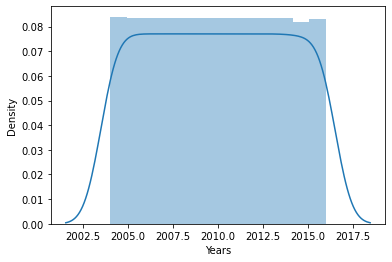

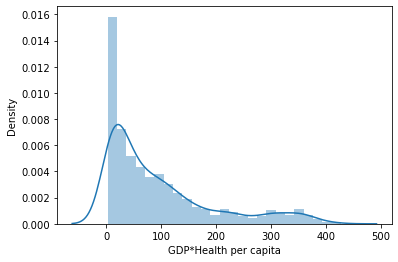

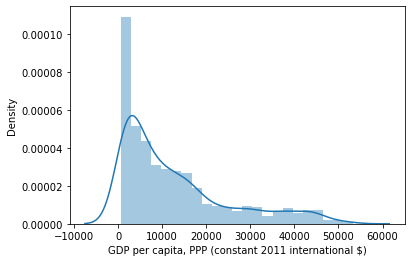

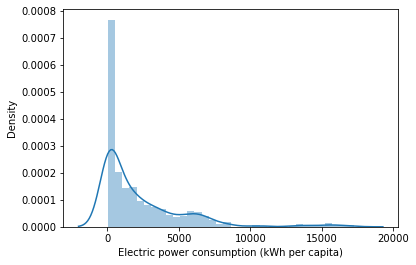

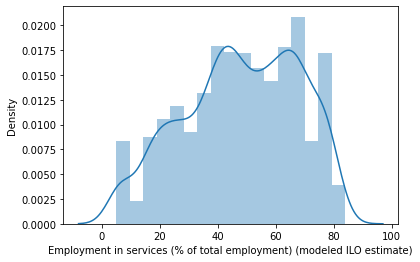

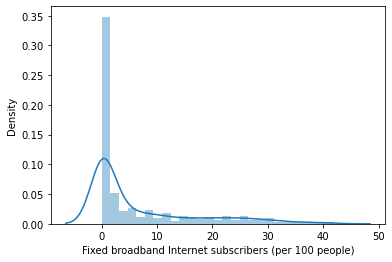

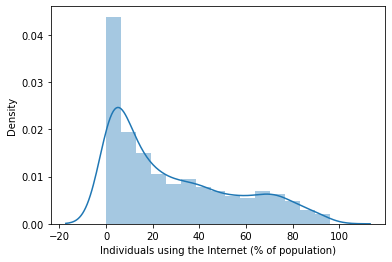

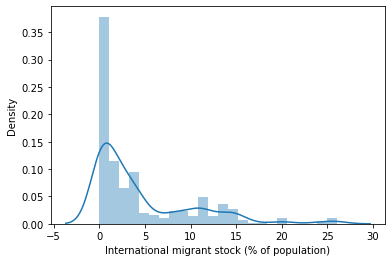

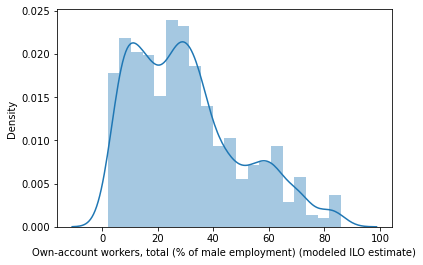

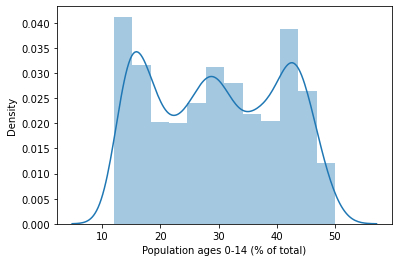

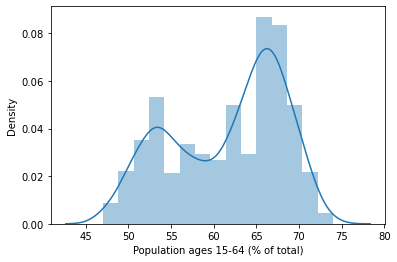

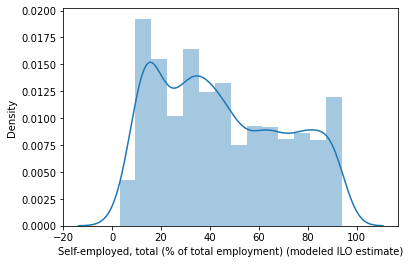

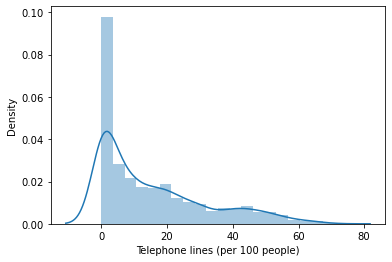

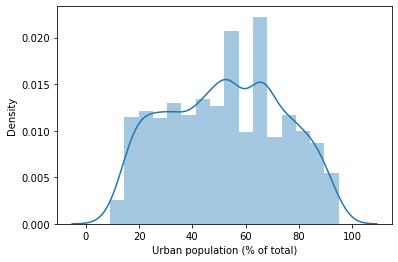

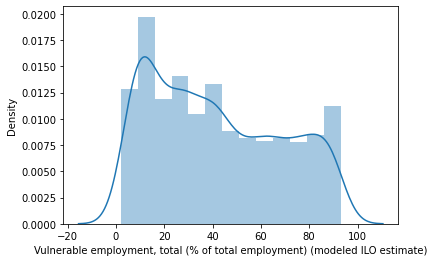

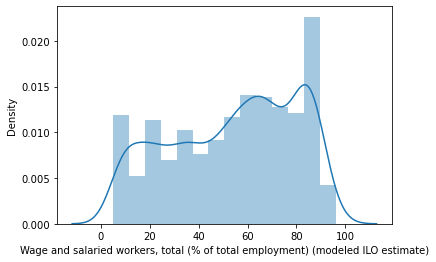

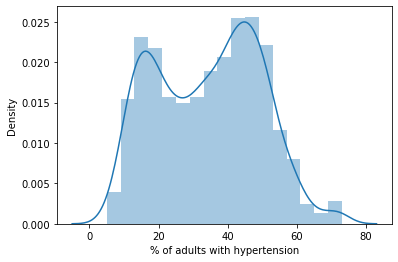

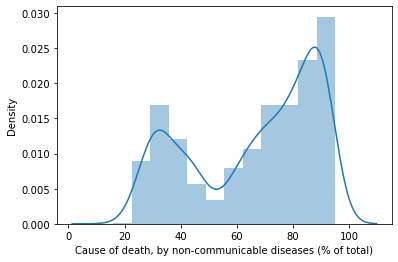

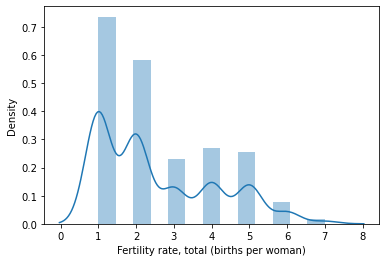

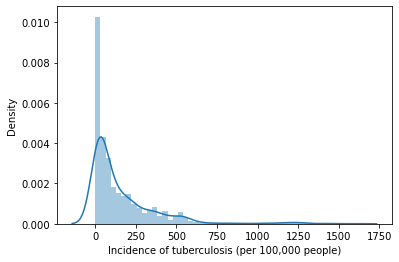

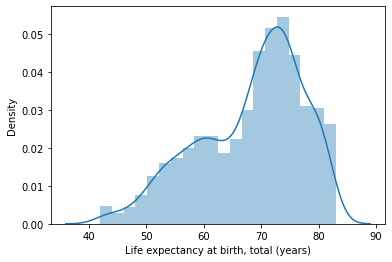

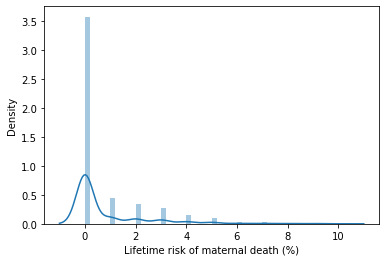

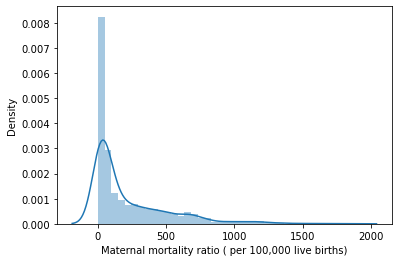

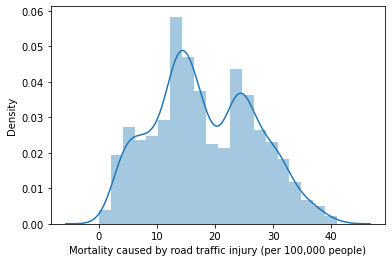

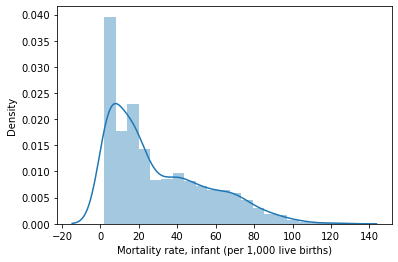

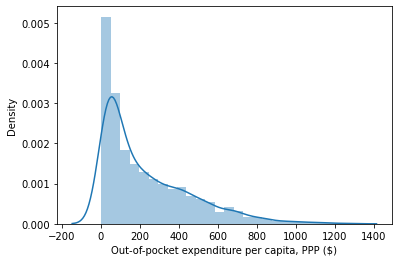

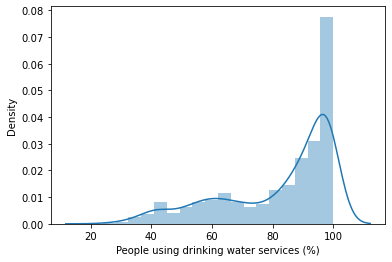

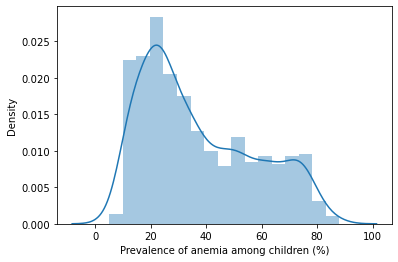

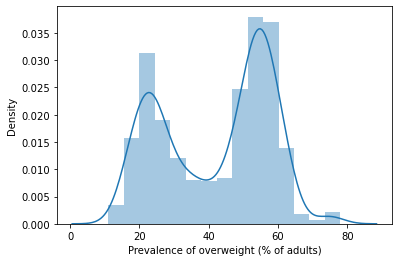

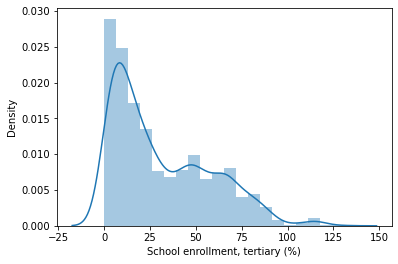

In [11]:
# Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
for column in numerical:
    sns.distplot(numerical[column])
    plt.show()

## Heatmap to check correlation, (output : 'GDP*Health per capita')

,Years,GDP*Health per capita,"GDP per capita, PPP (constant 2011 international $)",Electric power consumption (kWh per capita),Employment in services (% of total employment) (modeled ILO estimate),Fixed broadband Internet subscribers (per 100 people),Individuals using the Internet (% of population),International migrant stock (% of population),"Own-account workers, total (% of male employment) (modeled ILO estimate)",Population ages 0-14 (% of total),Population ages 15-64 (% of total),"Self-employed, total (% of total employment) (modeled ILO estimate)",Telephone lines (per 100 people),Urban population (% of total),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),"Maternal mortality ratio ( per 100,000 live births)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),Prevalence of overweight (% of adults),"School enrollment, tertiary (%)"
0,2004,6.0534,1062,62,21,0,0,0,42,47,49,75,0,22,74,24,32,44,7,189,57,8,1180,15,80,75,34,46,16,1
1,2005,6.5888,1136,62,21,0,1,0,42,47,50,74,0,22,73,25,33,44,6,189,58,7,1140,15,77,79,36,45,16,5
2,2006,6.7338,1161,62,22,0,2,0,42,47,50,74,0,22,73,25,34,44,6,189,58,7,1120,15,74,87,38,44,17,5
3,2007,7.5756,1284,62,23,0,1,0,42,47,49,72,0,23,71,27,35,44,6,189,59,7,1090,15,71,83,40,44,17,5
4,2008,7.6582,1298,301,25,0,1,0,42,47,49,72,0,23,71,27,36,44,6,189,59,6,1030,15,69,98,43,44,18,5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

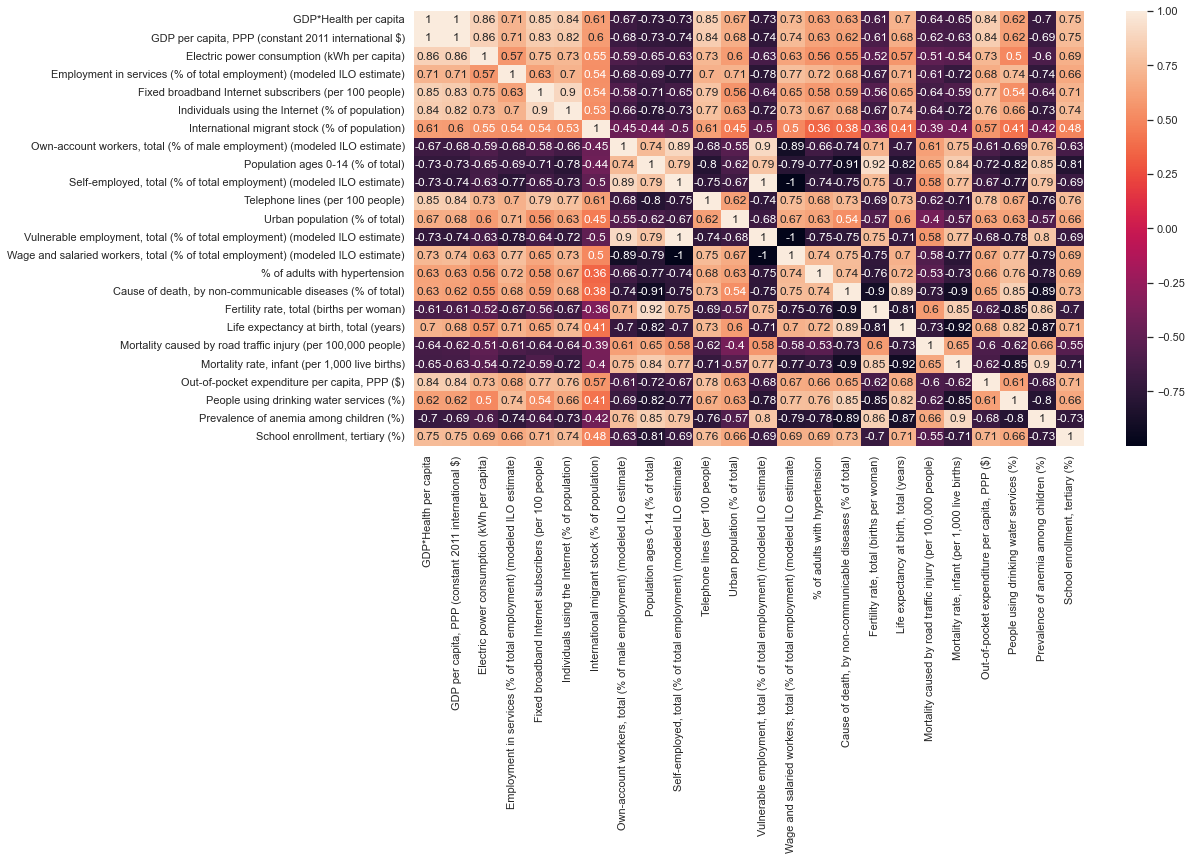

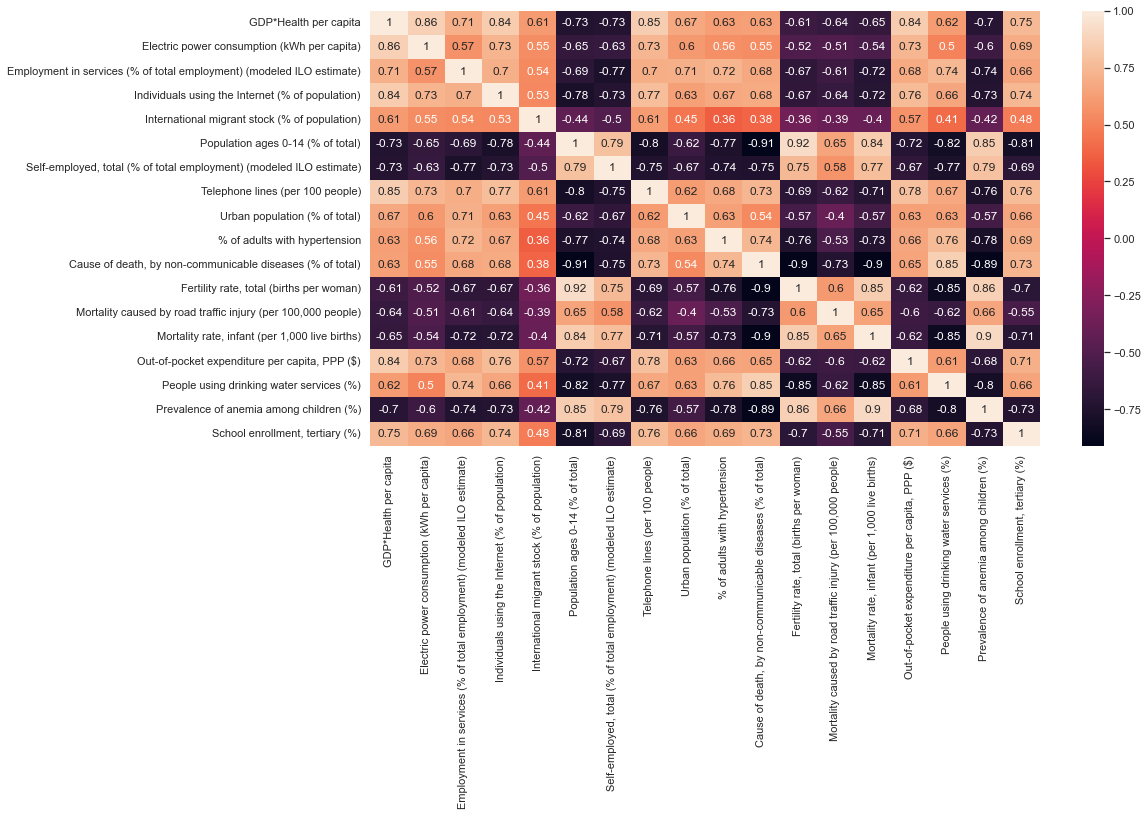

(1999, 18)

In [12]:
num = Synthesis.select_dtypes("number")
display(num.head())

cf = 0.6

columns = []
corr_matrix = num.corr()

for col in num.columns:
        if (abs(corr_matrix.loc[col, "GDP*Health per capita"]) >= cf):
            columns.append(col)
numerical_trimmed = pd.DataFrame(num, columns=columns)
pd.set_option('display.max_columns', None)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

numerical_trimmed = numerical_trimmed.drop(['Fixed broadband Internet subscribers (per 100 people)', 'GDP per capita, PPP (constant 2011 international $)', 'Wage and salaried workers, total (% of total employment) (modeled ILO estimate)', 'Life expectancy at birth, total (years)', 'Vulnerable employment, total (% of total employment) (modeled ILO estimate)', 'Own-account workers, total (% of male employment) (modeled ILO estimate)'], axis = 1)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()


numerical_trimmed.shape

## We keep 18 columns out of 31
#### 1 Output to predict : GDP*Health per capita
####  17 Features : those which has highest correlation to output and the lowest to each other to minimize the Noise & Overfitting

In [13]:
Synthesis2 = numerical_trimmed
Synthesis2.head()

,GDP*Health per capita,Electric power consumption (kWh per capita),Employment in services (% of total employment) (modeled ILO estimate),Individuals using the Internet (% of population),International migrant stock (% of population),Population ages 0-14 (% of total),"Self-employed, total (% of total employment) (modeled ILO estimate)",Telephone lines (per 100 people),Urban population (% of total),% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),"School enrollment, tertiary (%)"
0,6.0534,62,21,0,0,47,75,0,22,32,44,7,15,80,75,34,46,1
1,6.5888,62,21,1,0,47,74,0,22,33,44,6,15,77,79,36,45,5
2,6.7338,62,22,2,0,47,74,0,22,34,44,6,15,74,87,38,44,5
3,7.5756,62,23,1,0,47,72,0,23,35,44,6,15,71,83,40,44,5
4,7.6582,301,25,1,0,47,72,0,23,36,44,6,15,69,98,43,44,5


### Extraction dataframe for data Viz on Tableau

In [14]:
Synthesis["Country Name"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1994       Zimbabwe
1995       Zimbabwe
1996       Zimbabwe
1997       Zimbabwe
1998       Zimbabwe
Name: Country Name, Length: 1999, dtype: object

In [15]:
List = (Synthesis["Country Name"], Synthesis['Years'], Synthesis["GDP*Health per capita"], Synthesis2)
Synthesis3 = pd.concat(List, axis=1)
Synthesis3.to_excel("Synthesis_tableau.xlsx")


<IPython.core.display.Javascript object>

In [16]:
Synthesis2['GDP*Health per capita'].describe()

count    1999.000000
mean       94.265631
std        98.945929
min         2.905700
25%        18.004700
50%        58.102400
75%       128.620800
max       427.437000
Name: GDP*Health per capita, dtype: float64

## Train/test/split data

In [17]:
### X,y split

y = Synthesis2['GDP*Health per capita']
x = Synthesis2.drop(["GDP*Health per capita"], axis = 1)


In [18]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 80)
print(x_train.shape)
print(x_test.shape)

(1599, 17)
(400, 17)


## Scaling & transformation

In [19]:
### Normaliyation by columns 

transformer = MinMaxScaler().fit(x_train)
filename = "C:/Users/igrav/Desktop/ironhack/Lecture/Week_9/Project/Notebooks/Scalers/Standard_Scaler.pkl"
# with open(filename, "wb") as file:
#     pickle.dump(scaler, file)
x_train_norm = transformer.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_train_norm

<IPython.core.display.Javascript object>

,Electric power consumption (kWh per capita),Employment in services (% of total employment) (modeled ILO estimate),Individuals using the Internet (% of population),International migrant stock (% of population),Population ages 0-14 (% of total),"Self-employed, total (% of total employment) (modeled ILO estimate)",Telephone lines (per 100 people),Urban population (% of total),% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),"School enrollment, tertiary (%)"
0,0.297368,0.746835,0.291667,0.115385,0.236842,0.186813,0.338028,0.523256,0.500000,0.822785,0.000000,0.463415,0.168,0.383822,0.907895,0.289157,0.068702
1,0.038812,0.658228,0.031250,0.000000,0.605263,0.428571,0.197183,0.604651,0.632353,0.607595,0.166667,0.853659,0.160,0.150674,0.763158,0.216867,0.167939
2,0.161873,0.911392,0.104167,0.692308,0.394737,0.395604,0.211268,0.895349,0.500000,0.898734,0.166667,0.414634,0.080,0.279144,0.828947,0.216867,0.167939
3,0.079775,0.784810,0.395833,0.115385,0.500000,0.483516,0.140845,0.755814,0.676471,0.670886,0.166667,0.609756,0.208,0.223632,0.921053,0.289157,0.343511
4,0.002034,0.417722,0.406250,0.153846,0.631579,0.571429,0.140845,0.162791,0.308824,0.810127,0.333333,0.414634,0.064,0.021412,0.973684,0.349398,0.076336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.377317,0.645570,0.531250,0.115385,0.052632,0.142857,0.323944,0.744186,0.720588,0.924051,0.000000,0.292683,0.008,0.168121,0.986842,0.132530,0.412214
1595,0.029632,0.544304,0.125000,0.038462,0.605263,0.395604,0.112676,0.651163,0.558824,0.670886,0.333333,0.414634,0.272,0.051546,0.802632,0.590361,0.244275
1596,0.388531,0.898734,0.281250,1.000000,0.394737,0.098901,0.619718,0.953488,0.647059,0.873418,0.166667,0.146341,0.016,0.379857,0.986842,0.084337,0.442748
1597,0.125675,0.721519,0.406250,0.000000,0.421053,0.318681,0.239437,0.802326,0.558824,0.784810,0.166667,0.341463,0.104,0.310864,0.947368,0.216867,0.221374


In [20]:
transformer = MinMaxScaler().fit(x_test)
x_test_norm = transformer.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns)
x_test_norm

<IPython.core.display.Javascript object>

,Electric power consumption (kWh per capita),Employment in services (% of total employment) (modeled ILO estimate),Individuals using the Internet (% of population),International migrant stock (% of population),Population ages 0-14 (% of total),"Self-employed, total (% of total employment) (modeled ILO estimate)",Telephone lines (per 100 people),Urban population (% of total),% of adults with hypertension,"Cause of death, by non-communicable diseases (% of total)","Fertility rate, total (births per woman)","Mortality caused by road traffic injury (per 100,000 people)","Mortality rate, infant (per 1,000 live births)","Out-of-pocket expenditure per capita, PPP ($)",People using drinking water services (%),Prevalence of anemia among children (%),"School enrollment, tertiary (%)"
0,0.002366,0.333333,0.020833,0.076923,0.921053,0.966667,0.000000,0.305882,0.313433,0.027778,0.833333,0.605263,0.606557,0.038801,0.534247,0.926829,0.051282
1,0.010494,0.487179,0.010417,0.384615,0.815789,0.866667,0.014493,0.435294,0.134328,0.125000,0.666667,0.631579,0.622951,0.078483,0.602740,0.853659,0.068376
2,0.023051,0.435897,0.020833,0.000000,0.342105,0.455556,0.130435,0.105882,0.343284,0.791667,0.166667,0.342105,0.073770,0.086420,0.767123,0.280488,0.153846
3,0.002184,0.128205,0.020833,0.076923,0.763158,0.511111,0.028986,0.423529,0.179104,0.138889,0.666667,0.657895,0.491803,0.068783,0.383562,0.792683,0.025641
4,0.205823,0.615385,0.333333,0.038462,0.131579,0.255556,0.463768,0.611765,0.582090,0.930556,0.000000,0.394737,0.032787,0.202822,0.972603,0.378049,0.521368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.002184,0.410256,0.364583,0.153846,0.631579,0.600000,0.159420,0.164706,0.298507,0.791667,0.333333,0.105263,0.065574,0.027337,0.972603,0.341463,0.085470
396,0.340916,0.948718,0.864583,0.423077,0.131579,0.111111,0.768116,0.847059,0.597015,0.902778,0.000000,0.078947,0.016393,0.393298,1.000000,0.097561,0.487179
397,0.002366,0.012821,0.041667,0.038462,0.868421,0.655556,0.014493,0.070588,0.164179,0.166667,0.500000,0.789474,0.352459,0.004409,0.493151,0.682927,0.000000
398,0.002184,0.730769,0.270833,0.538462,0.657895,0.288889,0.144928,0.423529,0.507463,0.555556,0.166667,0.842105,0.122951,0.083774,0.890411,0.231707,0.162393


## Apply the linear model & results

In [21]:

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
MAPE_train = mean_absolute_percentage_error(y_pred_train, y_train)
MAPE_test = mean_absolute_percentage_error(y_pred_test, y_test)

print("R2 score of train dataset is", round(r2_train,3))
print("R2 score of test dataset is", round(r2_test,3))
print()
print("MAPE of train dataset is", round(MAPE_train, 2))
print("MAPE of test dataset is", round(MAPE_test, 2))


R2 score of train dataset is 0.905
R2 score of test dataset is 0.868

MAPE of train dataset is 1.72
MAPE of test dataset is 0.69


## Apply DecisionTreeRegressor & Results

In [22]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=10,
                             min_samples_split = 10,
                             min_samples_leaf =5,
                             random_state = 42)
regr.fit(x_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(x_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(x_test, y_test)))

Train data R2 was: 0.99
Test data R2 was: 0.96


## Apply KNeighborsRegressor & Results

In [23]:
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor(n_neighbors=3)
regr.fit(x_train, y_train)
print("Train data R2 was: {:.2f}".format(regr.score(x_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(x_test, y_test)))

Train data R2 was: 0.97
Test data R2 was: 0.92


# Hyperparameter search

## Apply RandomForestRegressor + GridSearchCV & Result

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth_choices= [8,10,12]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [8,10,12] 
min_samples_leaf_choices = [5,6,7] 
# Create the  grid 
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

### More detailed search : optimization parameters

In [ ]:
max_depth_choices= [9,10,11]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [9,10,11] 
min_samples_leaf_choices = [4,5,6] 
# Create the  grid 
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

## Apply RandomForestRegressor model & Results

In [25]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=10,
                             min_samples_split = 10,
                             min_samples_leaf =5,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

y_pred = clf.predict(x_test_norm)
y_pred = clf.predict(x_test_norm)
print('\n\n What characteristics have an impact on wealth and Health per individual?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance

The R2 for the Random Forest in the TRAIN set is 0.99
The R2 for the Random Forest in the TEST  set is 0.97


 What characteristics have an impact on wealth and Health per individual?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('Electric power consumption (kWh per capita)', 176.0),
 ('Out-of-pocket expenditure per capita, PPP ($)', 123.0),
 ('Telephone lines (per 100 people)', 101.0),
 ('Cause of death, by non-communicable diseases (% of total)', -90.0),
 ('Individuals using the Internet (% of population)', 57.0),
 ('Mortality caused by road traffic injury (per 100,000 people)', -56.0),
 ('% of adults with hypertension', -48.0),
 ('Prevalence of anemia among children (%)', -40.0),
 ('Urban population (% of total)', 22.0),
 ('Population ages 0-14 (% of total)', -21.0),
 ('School enrollment, tertiary (%)', 21.0),
 ('Employment in services (% of total employment) (modeled ILO estimate)',
  19.0),
 ('Self-employed, total (% of total employment) (modeled ILO estimate)',
  -17.0),
 ('People using drinking water services (%)', 15.0),
 ('Fertility rate, total (births per woman)', 13.0),
 ('Mortality rate, infant (per 1,000 live births)', -9.0),
 ('International migrant stock (% of population)', -2.0)]

In [26]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(x_train_norm, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(x_train_norm, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(x_test_norm, y_test)))

y_pred = clf.predict(x_test_norm)
y_pred = clf.predict(x_test_norm)
print('\n\n What characteristics have an impact on wealth and Health per individual?')
column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, np.round_(lm.coef_)))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1]) for item in column_relevance]
column_relevance

The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 0.98


 What characteristics have an impact on wealth and Health per individual?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[('Electric power consumption (kWh per capita)', 176.0),
 ('Out-of-pocket expenditure per capita, PPP ($)', 123.0),
 ('Telephone lines (per 100 people)', 101.0),
 ('Cause of death, by non-communicable diseases (% of total)', -90.0),
 ('Individuals using the Internet (% of population)', 57.0),
 ('Mortality caused by road traffic injury (per 100,000 people)', -56.0),
 ('% of adults with hypertension', -48.0),
 ('Prevalence of anemia among children (%)', -40.0),
 ('Urban population (% of total)', 22.0),
 ('Population ages 0-14 (% of total)', -21.0),
 ('School enrollment, tertiary (%)', 21.0),
 ('Employment in services (% of total employment) (modeled ILO estimate)',
  19.0),
 ('Self-employed, total (% of total employment) (modeled ILO estimate)',
  -17.0),
 ('People using drinking water services (%)', 15.0),
 ('Fertility rate, total (births per woman)', 13.0),
 ('Mortality rate, infant (per 1,000 live births)', -9.0),
 ('International migrant stock (% of population)', -2.0)]

## Apply RandomForestRegressor + cross_val_score & Result

In [27]:
from sklearn.model_selection import cross_val_score

y_true = y_train
clf = RandomForestRegressor(max_depth=10,
                             min_samples_split = 9,
                             min_samples_leaf =4,
                             max_samples=.9,
                             random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cross_val_scores_train = cross_val_score(clf, x_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(clf, x_test, y_test, cv=5)


print("The mean R2 Train of the folds was {:.2f}".format(np.mean(cross_val_scores_train)))
print("The mean R2 Test of the folds was {:.2f}".format(np.mean(cross_val_scores_test)))

<IPython.core.display.Javascript object>

The mean R2 Train of the folds was 0.98


<IPython.core.display.Javascript object>

The mean R2 Test of the folds was 0.91


## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= [8,10,12]
criterion_choices = ['squared_error','absolute_error'] 
min_samples_split_choices = [8,10,12] 
min_samples_leaf_choices = [5,6,7] 
# Create the  grid 
random_grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}
# Instantiate the grid search model object
model = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 10) 
random_search.fit(x_train, y_train)
random_search.best_params_